In [79]:
!pip install git+https://github.com/siavash-saki/tesspy

  Cloning https://github.com/siavash-saki/tesspy to c:\users\hamann\appdata\local\temp\pip-req-build-33551uzx


  Running command git clone -q https://github.com/siavash-saki/tesspy 'C:\Users\Hamann\AppData\Local\Temp\pip-req-build-33551uzx'


In [85]:
import tesspy.tesspy as tp

import matplotlib.pyplot as plt
import geopandas as gpd

import warnings
warnings.filterwarnings('ignore')

In [86]:
city = "Frankfurt am Main"

df_city = tp.get_admin_polygon(city)

In [87]:
gdf = gpd.read_file("ffm_poi_5categories_gdf.geojson")
pip = gdf.within(df_city.loc[0,"geometry"])
POI_FFM = gdf.loc[pip]

In [88]:
res_hexagon = 8
res_square = 15

LGU_hexagons = tp.TessObj.hexagon(df_city,df_city, res_hexagon)
LGU_squares = tp.TessObj.quadKey(df_city,df_city, res_square)

print(f"Using resolution {res_hexagon} the tessellation has {LGU_hexagons.shape[0]} LGUs using hexagons.")
print(f"Using resolution {res_square} the tessellation has {LGU_squares.shape[0]} LGUs using squares.")

Using resolution 8 the tessellation has 669 LGUs using hexagons.
Using resolution 15 the tessellation has 488 LGUs using squares.


In [89]:
LGU_aqk = tp.TessObj.adaptive_quadkey(df_city, df_city, POI_FFM, 14)

print(f"Using resolution {14} the tessellation has {LGU_aqk.shape[0]} LGUs using adaptive squares.")

Using resolution 14 the tessellation has 1268 LGUs using adaptive squares.


In [90]:
LGU_cb = tp.TessObj.cityblocks(df_city,df_city)

print(f"Using city blocks the tessellation has {LGU_cb.shape[0]} LGUs.")

Threshold for nb of LGUs is 2590
Threshold for HDBSCAN distance_threshold is 450 and should be sth like 500
Using city blocks the tessellation has 2462 LGUs.


(0.0, 1.0, 0.0, 1.0)

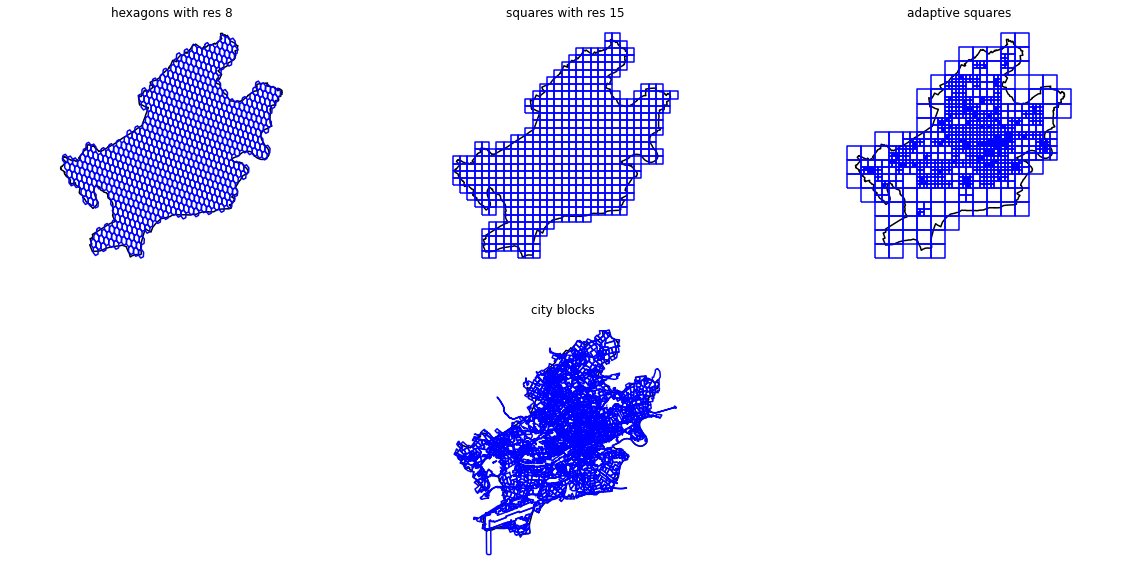

In [96]:
fig, axes = plt.subplots(2,3, figsize=(20,10))

df_city.boundary.plot(ax=axes[0][0], color='black')
LGU_hexagons.boundary.plot(ax=axes[0][0], color='blue')
axes[0][0].set_axis_off()
axes[0][0].set_title(f"hexagons with res {res_hexagon}")

df_city.boundary.plot(ax=axes[0][1], color='black')
LGU_squares.boundary.plot(ax=axes[0][1], color='blue')
axes[0][1].set_axis_off()
axes[0][1].set_title(f"squares with res {res_square}")


df_city.boundary.plot(ax=axes[0][2], color='black')
LGU_aqk.boundary.plot(ax=axes[0][2], color='blue')
axes[0][2].set_axis_off()
axes[0][2].set_title(f"adaptive squares")

df_city.boundary.plot(ax=axes[1][1], color='black')
LGU_cb[LGU_cb.geom_type=="Polygon"].boundary.plot(ax=axes[1][1], color='blue')
axes[1][1].set_axis_off()
axes[1][1].set_title(f"city blocks ")


axes[1][0].axis('off')
axes[1][2].axis('off')